In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,1/14)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

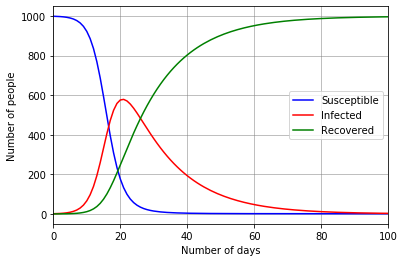

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 3041764
Total deaths: 211167
Total recovered: 893967
Based on the WHO data, the death rate is between 6.9 % and 19.1 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

5.092167687751182
2.9375007477052058


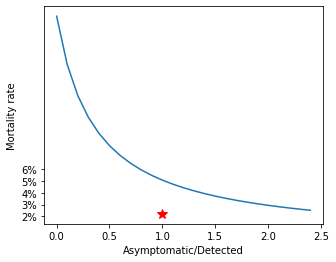

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Italy'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Italy 199414
Total deaths Italy 26977
Total recovered  Italy 66624
Based on the WHO data, the death rate in Italy is between 13.5 % and 28.8 % of the total confirmed case


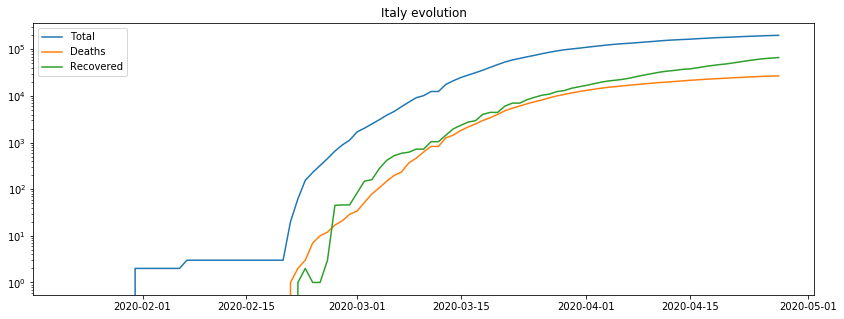

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

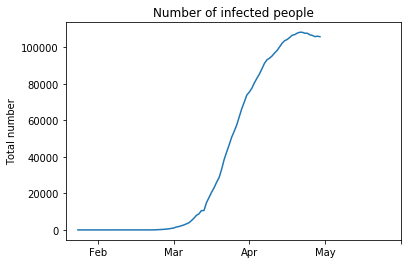

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [15]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [16]:
print(whichcountry('Italy')[0])#confirmed last day
print(whichcountry('Italy')[2])#recovered last day

[     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     19     59    150    221    311    438    593    821   1053   1577
   1835   2263   2706   3296   3916   5061   6387   7985   8794  10590
  10590  14955  17750  20603  23073  26062  28710  33190  38549  42681
  46638  50826  54030  57521  62013  66414  70065  73880  75528  77635
  80572  83049  85388  88274  91246  93187  94067  95262  96877  98273
 100269 102253 103616 104291 105418 106607 106962 107771 108257 108237
 107709 107699 106848 106527 105847 106103 105813]
66624


In [17]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,1703
1,Albania,736
2,Algeria,3517
3,Andorra,743
4,Angola,27
...,...,...
259,France,1
260,South Sudan,6
261,Western Sahara,6
262,Sao Tome and Principe,4


In [18]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [19]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-04-27      286      931     2363         494     9474    28602   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-04-27                     846      1099     659      814  ...     7557   

            Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  \
2020-04-27    5635       960      1098  85069   15647         5299   75570   

            Ukraine  United Kingdom  
2020-04-27     7925          136384  

[1 rows x 47 columns]


In [20]:
#print(df_active['Italy'])

In [20]:
df_active.to_csv('active_infected',index=True)

In [21]:
data = pd.read_csv('active_infected')
#print(data['Italy'])

In [22]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96]


In [23]:
n_countries = len(countries_list)

In [24]:
today=len(xdata)

In [25]:
array_country=whichcountry('Italy')[0]

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,1/14*R0,1/14,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [26]:
#definition of the ideal r0

xgrid=np.arange(0.01,1.3,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [27]:
#time(minimizer_vec(xgrid))

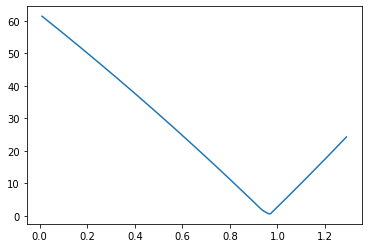

0.97


In [28]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [29]:
time_window=5

def minimizer_gen(t1,t2,xgrid=np.arange(0.1,5,0.01)):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [30]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286]


In [32]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+2,200)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 2.0
48 4.0
49 6.0
50 3.9
51 2.85
52 2.53
53 2.53
54 2.03
55 2.0
56 2.23
57 2.47
58 2.63
59 2.91
60 2.76
61 2.44
62 2.43
63 2.09
64 1.38
65 1.63
66 1.51
67 1.29
68 1.45
69 1.56
70 1.9
71 1.96
72 1.89
73 1.33
74 0.75
75 0.55
76 0.72
77 0.71
78 0.74
79 0.87
80 0.97
81 1.15
82 1.19
83 1.39
84 1.06
85 1.17
86 1.02
87 1.37
88 1.49
89 1.39
90 1.38
91 1.48
92 1.47
Armenia [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   1   1   1   1   1   1   1   1   1   1   4   8  18  26
  52  77  83 114 135 159 192 233 235 249 271 300 376 391 449 499 536 623
 686 720 758 763 758 758 773 776 781 803 814 786 797 783 780 705 726

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 2.0
40 4.0
41 6.0
42 8.0
43 7.34
44 4.69
45 3.16
46 3.03
47 2.83
48 4.3
49 4.69
50 5.85
51 3.94
52 3.73
53 3.37
54 3.35
55 3.47
56 3.63
57 3.48
58 2.78
59 2.86
60 2.49
61 3.07
62 3.59
63 3.68
64 3.17
65 3.2
66 2.38
67 1.94
68 1.86
69 1.96
70 2.03
71 1.94
72 1.82
73 1.61
74 1.61
75 1.61
76 1.54
77 1.6
78 1.54
79 1.46
80 1.48
81 1.47
82 1.5
83 1.64
84 1.3
85 1.34
86 1.43
87 1.41
88 1.39
89 1.26
90 1.26
91 1.28
92 1.3
Bosnia and Herzegovina [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   2   2   3   3   3   5   7  11  13  18  24
  25  24  36  61  87  90 123 133 161 171 186 228 248 309 341 390 427 497
 535 573 601 598 663 691 722 736 770 777 792 807 816 847 848 883 890 879
 854 855 874 828 837 833 846]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 

35 0.0
36 0.99
37 1.01
38 3.01
39 4.83
40 6.14
41 6.63
42 6.64
43 5.25
44 1.02
45 1.85
46 2.65
47 3.55
48 5.02
49 7.02
50 9.02
51 5.43
52 4.11
53 2.92
54 2.23
55 2.08
56 1.8
57 1.95
58 1.97
59 1.9
60 1.94
61 2.65
62 2.92
63 3.12
64 1.96
65 1.95
66 1.63
67 1.61
68 1.69
69 2.06
70 2.12
71 2.11
72 1.61
73 1.41
74 1.27
75 1.36
76 1.35
77 1.31
78 1.35
79 1.26
80 1.16
81 1.24
82 1.24
83 1.22
84 1.21
85 1.18
86 1.2
87 1.09
88 1.07
89 1.06
90 1.05
91 1.1
92 1.03
Finland [   0    0    0    0    0    0    0    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    1    1    2    5    5    5
    5   11   14   14   22   29   39   58   58  154  224  234  267  311
  326  390  440  512  615  689  781  867  943 1024 1148 1219 1329 1391
 1419 1199 1295 1557 1599 1849 1974 2147 2263 2421 2556 2618 2705 2797
 2865 1594 1707 1891 1989 1770 1873 1980 2112 1718 1789 1886 2002]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.

6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 2.0
38 4.0
39 6.0
40 8.0
41 7.14
42 4.04
43 2.85
44 2.41
45 2.44
46 3.41
47 3.64
48 3.88
49 3.72
50 3.05
51 2.41
52 2.59
53 3.28
54 3.74
55 3.55
56 3.85
57 3.29
58 2.45
59 2.44
60 2.05
61 2.26
62 2.31
63 1.93
64 1.96
65 1.73
66 1.56
67 1.54
68 1.44
69 1.54
70 1.21
71 1.11
72 0.91
73 1.01
74 0.65
75 0.36
76 0.39
77 0.31
78 0.21
79 0.17
80 0.29
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
Ireland [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     1     1     1     2     6     6    18    18    19    21
    34    42    42    89   127   127   167   216   285 

10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.99
39 1.01
40 1.0
41 3.0
42 4.82
43 5.83
44 3.82
45 5.29
46 4.95
47 6.95
48 8.95
49 8.42
50 6.18
51 4.77
52 5.78
53 7.08
54 7.8
55 6.5
56 6.54
57 5.02
58 3.85
59 3.32
60 3.13
61 3.38
62 2.73
63 2.26
64 2.06
65 2.02
66 1.74
67 1.73
68 1.97
69 1.2
70 0.98
71 0.78
72 1.54
73 1.44
74 1.43
75 1.52
76 1.38
77 1.39
78 1.26
79 1.1
80 1.06
81 1.11
82 1.14
83 1.15
84 1.12
85 1.03
86 1.05
87 1.0
88 1.01
89 0.0
90 0.0
91 0.0
92 0.0
Malta [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   3   3   3   5   6   6  11  17  20
  28  36  36  51  62  71  88 105 108 127 132 137 147 149 154 167 186 194
 200 211 222 236 288 282 319 332 351 331 337 346 352 327 328 324 306 302
 290

50 3.57
51 2.35
52 2.38
53 2.25
54 2.26
55 2.25
56 2.5
57 2.42
58 2.44
59 2.39
60 2.21
61 2.18
62 2.18
63 2.23
64 2.1
65 1.77
66 1.67
67 1.57
68 1.63
69 1.64
70 1.59
71 1.46
72 1.41
73 1.34
74 1.29
75 1.24
76 1.16
77 1.24
78 1.2
79 1.19
80 1.17
81 1.15
82 1.16
83 1.21
84 1.19
85 1.12
86 1.13
87 1.1
88 1.15
89 1.16
90 1.16
91 1.1
92 1.09
Poland [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1    1    5    5   11   16   22   31   48   66  100  116  160  220
  233  349  419  530  626  740  890 1030 1198 1366 1613 1833 2017 2271
 2464 2833 3256 3432 3874 4144 4528 4824 5117 5456 5773 6003 6202 6321
 6628 6830 7181 7414 7887 8080 8158 8230 8317 8454 8623 8817 8874]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 

6 0.0
7 0.0
8 0.0
9 0.0
10 0.99
11 1.01
12 1.0
13 0.99
14 1.01
15 3.01
16 3.42
17 4.22
18 1.0
19 0.99
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 2.0
35 4.0
36 6.0
37 6.91
38 7.16
39 5.57
40 5.21
41 4.67
42 4.69
43 5.21
44 5.43
45 6.24
46 6.05
47 5.91
48 5.37
49 5.33
50 6.74
51 3.56
52 3.72
53 3.65
54 3.35
55 3.66
56 3.64
57 3.17
58 3.22
59 3.15
60 3.26
61 2.85
62 3.0
63 2.41
64 2.11
65 2.0
66 1.97
67 1.98
68 1.78
69 1.6
70 1.48
71 1.36
72 1.32
73 1.23
74 1.25
75 1.16
76 1.11
77 1.08
78 1.08
79 1.05
80 1.03
81 1.05
82 1.16
83 1.38
84 1.48
85 1.45
86 1.14
87 1.14
88 0.99
89 1.14
90 1.17
91 1.12
92 0.38
Sweden [    0     0     0     0     0     0     0     0     0     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     2
     7     7    12    14    15    21    35    94   101   161   203   247
   354   498   597   812   958  101

IndexError: list index out of range

In [33]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
#print(r0_countries0)

In [34]:
r0_countries_tot=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries_tot.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries_tot['Germany'].head())

2020-01-26    0.0
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
Name: Germany, dtype: float64


In [35]:
r0_countries_tot.to_csv('r0_countries_allinone.csv',index=True)

In [36]:
r0_countries_imp = pd.read_csv('r0_countries_allinone.csv')

In [41]:
print(r0_countries_imp['Germany'])

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
      ... 
88    0.38
89    0.25
90    0.42
91    0.45
92    0.48
Name: Germany, Length: 93, dtype: float64


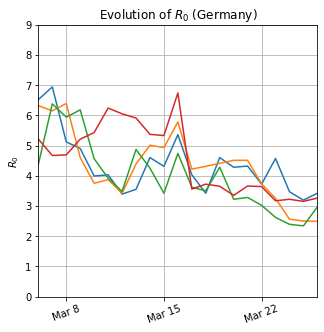

In [47]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['France'])
plt.plot(r0_countries_imp['Spain'])
#plt.plot(r0_countries_imp['Denmark'])
#plt.plot(r0_countries_imp['Albania'])
#plt.plot(r0_countries_imp['Belarus'])
#plt.plot(r0_countries_imp['Sweden'])
plt.xticks(np.arange(0-(time_window-5),93,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19', 'Apr 26'],rotation=20)
plt.xlim(40,60)#today)
plt.ylabel('$R_0$')
plt.ylim(0,9)
plt.grid()
plt.title('Evolution of $R_0$ (Germany)')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()